# **Redes de decisión y el mundo del Wumpus**

Juan Sebastián Cortés, Carlos Garavito
***

## Descripción del problema

En este proyecto se modifique la función `crear_red_decision`, implementada en el notebook `Redes de decisión` visto en clase, para incluir las variables de hedor y Wumpus, tal que el héroe sea capaz de encontrar el oro y salir del laberinto sin caer en un pozo y sin ser devorado por el Wumpus.

## Modificación de la función

La estrategia para modificar la función es: 

1. Crear variables de Wumpus y hedor
2. Crear las aristas del grafo para Wumpus y hedor
3. Crear las tablas de probabilidad para el Wumpus y sus casillas adyacentes, 
4. Crear la función utilidad

A continuación, se muestran las funiciones en `python` implementadas que realizan cada uno de los puntos anteriors. Luego de la explicación, se muestra la función `crear_red_decision` con las correcciones aplicadas. 


### 1. Crear variables de Wumpus y hedor

Dentro de la función `crear_red_decision` se incluyen los siguientes ciclos `for` que crear las variables para las casillas adyacentes, dada una casilla:

In [ ]:
# no correr, solo explicativo

# Creando variables de wumpus
for c in casillas_adyacentes3:
    wumpus_i = gum.LabelizedVariable('wumpus'+str(c),'wumpus'+str(c),2)
    model.addChanceNode(wumpus_i)

# Creando variables de hedor
for c1 in casillas_adyacentes2:
    hedor_i = gum.LabelizedVariable('hedor'+str(c1),'hedor'+str(c1),2)
    model.addChanceNode(hedor_i)


### 2. Crear las aristas del grafo para Wumpus y hedor


De igual manera, dentro de la función `crear_red_decision` se incluyen los siguientes ciclos `for` que crear las aristas del grafos, dada una casilla:

In [ ]:
# no correr, solo explicativo

for c in casillas_adyacentes3:
    for c1 in adyacentes(c):
        if c1 in casillas_adyacentes2:
            model.addArc('wumpus'+str(c), 'hedor'+str(c1))
for c in casillas:
    model.addArc('wumpus'+str(c), 'UtilityOfCasilla')

### 3. Crear las tablas de probabilidad para el Wumpus y sus casillas adyacentes, 


Se incluyen también ciclos que permiten la creación de las tablas de probabilidad. 

In [ ]:
# no correr, solo explicativo

wumpuss = ['wumpus'+str(c) for c in casillas_adyacentes3]
for wumpus in wumpuss:
    model.cpt(wumpus)[:]=[0.66,0.33]

for c in casillas_adyacentes2:
    hedor = 'hedor' + str(c)
    wumpus_hedor = ['wumpus'+str(c1) for c1 in adyacentes(c)]
    opciones = list(product(*[[0,1] for p in wumpus_hedor]))
    dicts_variables = [{wumpus_hedor[i]:op[i] for i in range(len(wumpus_hedor))} for op in opciones]
    for d in dicts_variables:
        model.cpt(hedor)[d] = wumpus_a_hedor(d)

### 4. Crear la función utilidad

Finalmente, la función de utilidad modificada que tiene en cuenta la presencia del Wumpus en el laberinto resulta como:

$$
U(\text{casilla}(x,y)) = \begin{cases}
1, & \text{si }Oro(x,y), \land \neg Wumpus(x,y) \neg Pozo(x,y) \\
0, & \text{si }\neg Pozo(x,y) \land \neg Wumpus(x,y) \\
-1, & \text {si } Pozo(x,y) \lor Wumpus(x,y)
\end{cases}
$$

Su implementación es:

In [ ]:
# no correr, solo explicativo

def utilidad(d):
    C = d['Casilla']
    if (d['wumpus'+str(C)] == 0) and (d['oro'] == C ) and (d['pozo'+str(C)] == 0):
        return 1
    elif (d['pozo'+str(C)] == 0) and (d['wumpus'+str(C)] == 0) :
        return 0
    else:
        return -1

### Función resultante `crear_red_decision`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from entornos import *
from agentes import *
from busqueda import *
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
gum.config['notebook','potential_visible_digits']=2
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [6]:
# correr para ver resultados

W = Wumpus()
def adyacentes(c):
    return W.adyacentes(c)

def crear_red_decision(cas):   
    
    model = gum.InfluenceDiagram()
    
    todas_casillas = [(x,y) for x in range(4) for y in range(4)]
    total_casillas = len(todas_casillas)
    casillas = adyacentes(cas)
    num_casillas = len(casillas)
    aux = [adyacentes(c) for c in casillas]
    aux = [item for sublist in aux for item in sublist]
    casillas_adyacentes2 = list(set(aux))
    aux = [adyacentes(c) for c in casillas_adyacentes2]
    aux = [item for sublist in aux for item in sublist]
    casillas_adyacentes3 = list(set(aux))

    # Creando variables del oro y brillo
    oro = gum.LabelizedVariable('oro','oro',total_casillas)
    for i, c in enumerate(todas_casillas):
        oro.changeLabel(i,str(c))
        brillo_i = gum.LabelizedVariable('brillo'+str(c),'brillo'+str(c),2)
        model.addChanceNode(brillo_i)
    model.addChanceNode(oro)

    # Creando variables de pozo
    for c in casillas_adyacentes3:
        pozo_i = gum.LabelizedVariable('pozo'+str(c),'pozo'+str(c),2)
        model.addChanceNode(pozo_i)

    # Creando variables de brisa
    for c1 in casillas_adyacentes2:
        brisa_i = gum.LabelizedVariable('brisa'+str(c1),'brisa'+str(c1),2)
        model.addChanceNode(brisa_i)

    # Creando variables de wumpus
    for c in casillas_adyacentes3:
        wumpus_i = gum.LabelizedVariable('wumpus'+str(c),'wumpus'+str(c),2)
        model.addChanceNode(wumpus_i)

    # Creando variables de hedor
    for c1 in casillas_adyacentes2:
        hedor_i = gum.LabelizedVariable('hedor'+str(c1),'hedor'+str(c1),2)
        model.addChanceNode(hedor_i)

    # Creando variables de casilla
    casilla = gum.LabelizedVariable('Casilla','Casilla a moverse',num_casillas)
    for i, c in enumerate(casillas):
        casilla.changeLabel(i,str(c))
    model.addDecisionNode(casilla)

    # Creando variable de utilidad
    ut_casilla = gum.LabelizedVariable('UtilityOfCasilla','Valor casilla',1)
    model.addUtilityNode(ut_casilla)

    # Creando aristas del grafo
    for c in todas_casillas:
        model.addArc('oro', 'brillo'+str(c))
    for c in casillas_adyacentes3:
        for c1 in adyacentes(c):
            if c1 in casillas_adyacentes2:
                model.addArc('pozo'+str(c), 'brisa'+str(c1))
    for c in casillas:
        model.addArc('pozo'+str(c), 'UtilityOfCasilla')
    
    for c in casillas_adyacentes3:
        for c1 in adyacentes(c):
            if c1 in casillas_adyacentes2:
                model.addArc('wumpus'+str(c), 'hedor'+str(c1))
    for c in casillas:
        model.addArc('wumpus'+str(c), 'UtilityOfCasilla')

    model.addArc('oro', 'UtilityOfCasilla')
    model.addArc('Casilla', 'UtilityOfCasilla')
    
    # Creando tablas de probabilidad
    model.cpt('oro').fillWith([1/total_casillas]*total_casillas)
    for c in todas_casillas:
        brillo = 'brillo' + str(c)
        for c1 in todas_casillas:
            model.cpt(brillo)[{'oro': str(c1)}] = oro_a_brillo(c,c1)
    
    pozos = ['pozo'+str(c) for c in casillas_adyacentes3]
    for pozo in pozos:
        model.cpt(pozo)[:]=[0.8,0.2]

    for c in casillas_adyacentes2:
        brisa = 'brisa' + str(c)
        pozos_brisa = ['pozo'+str(c1) for c1 in adyacentes(c)]
        opciones = list(product(*[[0,1] for p in pozos_brisa]))
        dicts_variables = [{pozos_brisa[i]:op[i] for i in range(len(pozos_brisa))} for op in opciones]
        for d in dicts_variables:
            model.cpt(brisa)[d] = pozos_a_brisa(d)

    wumpuss = ['wumpus'+str(c) for c in casillas_adyacentes3]
    for wumpus in wumpuss:
        model.cpt(wumpus)[:]=[0.94,0.06]

    for c in casillas_adyacentes2:
        hedor = 'hedor' + str(c)
        wumpus_hedor = ['wumpus'+str(c1) for c1 in adyacentes(c)]
        opciones = list(product(*[[0,1] for p in wumpus_hedor]))
        dicts_variables = [{wumpus_hedor[i]:op[i] for i in range(len(wumpus_hedor))} for op in opciones]
        for d in dicts_variables:
            model.cpt(hedor)[d] = wumpus_a_hedor(d)

    for c in casillas_adyacentes2:
        brisa = 'brisa' + str(c)
        pozos_brisa = ['pozo'+str(c1) for c1 in adyacentes(c)]
        opciones = list(product(*[[0,1] for p in pozos_brisa]))
        dicts_variables = [{pozos_brisa[i]:op[i] for i in range(len(pozos_brisa))} for op in opciones]
        for d in dicts_variables:
            model.cpt(brisa)[d] = pozos_a_brisa(d)
        
    # Creando la utilidad
    wumpuss = ['wumpus'+str(c) for c in casillas]
    pozos = ['pozo'+str(c) for c in casillas]
    casillas = [str(c) for c in adyacentes(cas)]
    todas_casillas = [str(c) for c in todas_casillas]
    variables = ['Casilla','oro'] + pozos + wumpuss
    #print("variables: ", variables)
    opciones = list(product(casillas, todas_casillas, *[[0,1] for i in pozos], *[[0,1] for i in wumpuss]))
    #print("opciones 1: ", opciones)
    dicts_variables = [{variables[i]:op[i] for i in range(len(variables))} for op in opciones]
    #print("dicts_variables: ", dicts_variables)
    for d in dicts_variables:
        model.utility('UtilityOfCasilla')[d]=utilidad(d)

    return model

def pozos_a_brisa(d):
    if 1 not in d.values():
        return [1,0]
    else:
        return [0,1]

def wumpus_a_hedor(d):
    if 1 not in d.values():
        return [1,0]
    else:
        return [0,1]

def oro_a_brillo(c1,c2):
    if c1 == c2:
        return [0,1]
    else:
        return [1,0]
    
def utilidad(d):
    C = d['Casilla']
    if (d['wumpus'+str(C)] == 0) and (d['oro'] == C ) and (d['pozo'+str(C)] == 0):
        return 1
    elif (d['pozo'+str(C)] == 0) and (d['wumpus'+str(C)] == 0) :
        return 0
    else:
        return -1

## Resultados

Recuperando la función `tomar_decision`, `maximo_aleatorio` y el programa del agente en `programa_utility_based`: 

In [7]:
def tomar_decision(casilla, evs, tabla=False, imagen=False):
    # Creamos la red de decision para la casilla dada
    model = crear_red_decision(casilla)
    # Guardamos solo la evidencia que cae en las variables de la red de decisión
    evid = {v:evs[v] for v in evs.keys() if v in model.names()}
    # Hacemos la inferencia
    ie = gum.InfluenceDiagramInference(model)
    ie.setEvidence(evid)
    ie.makeInference()
    casillas = [c for c in adyacentes(casilla)]
    valores = ie.posteriorUtility("Casilla")
    if tabla:
        print(valores)
    # Escogemos la acción con mayor utilidad esperada
    decision = maximo_aleatorio(valores.tolist())
    if tabla:
        print('Decisión ->', casillas[decision])
    if imagen:
        gnb.showInference(model,evs=evid,targets={},size="30")
    return casillas[decision]


def maximo_aleatorio(valores):
    indices = [i for i, x in enumerate(valores) if x == max(valores)]
    return np.random.choice(indices)
    

def programa_utility_based(self, DEB=False):
       
    # Encuentra la casilla actual
    casilla_actual = self.loc
#    print('agente en:', casilla_actual, self.oro)
    direccion = self.direccion
    percepcion = self.perceptos
    casillas_seguras = self.seguras
    evidencia = self.evidencia
    oro = self.oro
    
    # Si tiene el oro y está en la casilla de salida, salir
    if oro and (casilla_actual == (0,0)):
        self.acciones = ['salir']
    # Si ve el oro, lo toma y planea un camino hasta la salida
    if 'brillo' in percepcion:
#        print("¡Veo el oro!")
        self.oro = True
        self.acciones = ['agarrar']
        R = Rejilla(casilla_actual, (0,0), casillas_seguras)
        camino = best_first_search(R)
        camino = [casilla_actual] + solucion(camino)
        acs = acciones_camino(camino, direccion)
        if DEB:
            print(f'desde {casilla_actual} hasta {casilla_ir}')
            print(f'sigue el camino {acs}')
        self.acciones += acs
    else:
        # Escoje la casilla de mayor utilidad
        casilla_ir = tomar_decision(casilla_actual, evidencia, tabla=DEB)
        camino = [casilla_actual, casilla_ir]
        acs = acciones_camino(camino, direccion)
        if DEB:
            print(f'desde {casilla_actual} hasta {casilla_ir}')
            print(f'sigue el camino {acs}')
        self.acciones += acs

setattr(Agente, "programa", programa_utility_based)


### Cargando el escenario de prueba y evaluando la corrección implementada

Es necesario mencionar, que se debe inicializar el problema dando la evidencia del pozo y el wumpus en la posición inicial: esto es, inicializar la variable evidencia como: 

```
evidencia = {'pozo(0, 0)':0, 'wumpus(0, 0)':0}. 
```

Además, también es necesario modificar la ejecución del programa, tal que se incluya la evidencia de las nuevas variables en cada iteración. Esto es, incluir dentro del ciclo `for` de ejecución los condicionales: 

```
if 'hedor' in agente.perceptos:                         
    agente.evidencia['hedor'+str(casilla_actual)] = 1  
else:                                                   
    agente.evidencia['hedor'+str(casilla_actual)] = 0
```


Juego terminado!
 Puntaje: 956


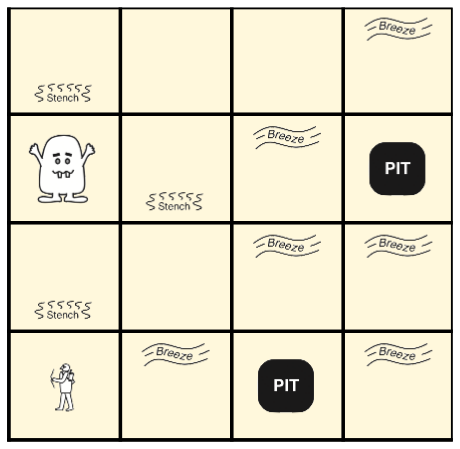

In [8]:
from time import sleep
from IPython.display import clear_output

W = Wumpus(wumpus=(0,2), oro=(3,3), pozos=[(2,0), (3,2)])
agente = Agente()
evidencia = {'pozo(0, 0)':0, 'wumpus(0, 0)':0} # modificado
casillas_seguras = []
setattr(Agente, "evidencia", evidencia)
setattr(Agente, "seguras", casillas_seguras)
formulas = agente.fluentes_mapa_mental()
formulas += [f'en(0,0)_1', 'mirando_e_1', 'segura(0,0)']
agente.base = LPQuery(formulas)
agente.perceptos = W.para_sentidos()
c = agente.interp_percepto(mundo='wumpus')
agente.base.TELL(c)
max_turnos = 50
W.pintar_todo()
plt.show()

for t in range(max_turnos):
    turnos_disp = max_turnos - t
    print("turnos disponibles", turnos_disp)
#    vis(agente)
    casilla_actual = agente.loc
    if casilla_actual not in casillas_seguras:
        casillas_seguras.append(agente.loc)
    agente.perceptos = W.para_sentidos()
    if 'brillo' not in agente.perceptos:
        agente.evidencia['brillo'+str(casilla_actual)] = 0
    if 'brisa' in agente.perceptos:
        agente.evidencia['brisa'+str(casilla_actual)] = 1
    else:
        agente.evidencia['brisa'+str(casilla_actual)] = 0     
    if 'hedor' in agente.perceptos:                         # nuevo
        agente.evidencia['hedor'+str(casilla_actual)] = 1   # nuevo
    else:                                                   # nuevo
        agente.evidencia['hedor'+str(casilla_actual)] = 0   # nuevo
    print("Evidencia: ", agente.evidencia)
    a = agente.reaccionar(DEB=False)
    print("Accion: ", a)
    formula_accion = f'{a}_{agente.turno-1}'
    agente.base.TELL(formula_accion)
    W.transicion(a)
    if not W.juego_activo:
        clear_output(wait=True)
        print(W.mensaje)
        break
    clear_output(wait=True)
    agente.estimar_estado(W)
    W.pintar_todo()
    plt.show()
    sleep(.25) 